In [192]:
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn import metrics
from sklearn import datasets

def m(buffer, args=""):
    """print() function wrapper for less typing :)

    Args:
        buffer ([type]): [description]
        args (str, optional): [description]. Defaults to "".
    """
    print(buffer, args)

In [193]:
iris = datasets.load_iris()

# Data has 4 features: Sepal Length, Sepal Width, Petal Length, Petal Width
# shorting the names for convenience -> sl, sw, pl, pw
# species has three unique values: setosa-> 0, versicolor-> 1, virginica -> 2

df = pd.DataFrame({
    "sl": iris.data[:,0],
    "sw": iris.data[:,1],
    "pl": iris.data[:,2],
    "pw": iris.data[:,3],
    'species': iris.target
})

# add id to all rows from 1
df.insert(0,'Id', range(1, 1+ len(df)))

m(df.head())
m(df.columns)
m(df.describe())



   Id   sl   sw   pl   pw  species
0   1  5.1  3.5  1.4  0.2        0
1   2  4.9  3.0  1.4  0.2        0
2   3  4.7  3.2  1.3  0.2        0
3   4  4.6  3.1  1.5  0.2        0
4   5  5.0  3.6  1.4  0.2        0 
Index(['Id', 'sl', 'sw', 'pl', 'pw', 'species'], dtype='object') 
               Id          sl          sw          pl          pw     species
count  150.000000  150.000000  150.000000  150.000000  150.000000  150.000000
mean    75.500000    5.843333    3.057333    3.758000    1.199333    1.000000
std     43.445368    0.828066    0.435866    1.765298    0.762238    0.819232
min      1.000000    4.300000    2.000000    1.000000    0.100000    0.000000
25%     38.250000    5.100000    2.800000    1.600000    0.300000    0.000000
50%     75.500000    5.800000    3.000000    4.350000    1.300000    1.000000
75%    112.750000    6.400000    3.300000    5.100000    1.800000    2.000000
max    150.000000    7.900000    4.400000    6.900000    2.500000    2.000000 


In [194]:
x_axis = df[['sl', 'sw', 'pl', 'pw']]
y_axis = df["species"]

# split data into training & testing for x & y axis
# <axis_lable>_axis_<type_shorted>
x_axis_tr, x_axis_ts, y_axis_tr, y_axis_ts = tts(x_axis.values,y_axis.values, test_size=30/100)


In [195]:
_knn = knn(n_neighbors=6) # set k to 5
_knn.fit(x_axis_tr, y_axis_tr)

KNeighborsClassifier(n_neighbors=6)

In [196]:
y_axis_pr = _knn.predict(x_axis_ts)
m(y_axis_pr)

[1 0 0 0 0 0 1 2 2 0 0 2 2 0 0 1 1 2 1 2 1 0 2 1 2 2 2 1 1 2 1 0 0 1 0 0 1
 1 0 0 2 2 1 1 0] 


In [197]:
# accuracy
m("accuracy: ", metrics.accuracy_score(y_axis_ts, y_axis_pr))

accuracy:  1.0


In [198]:
# trying to classify new data
feature = [[1,2,3,5]] # new data filled with random values

if (_knn.predict(feature) == 0):
    m("Iris:setosa")
elif (_knn.predict(feature) == 1):
    m("Iris:versicolor")
else:
    m("Iris:verginica")

Iris:versicolor 


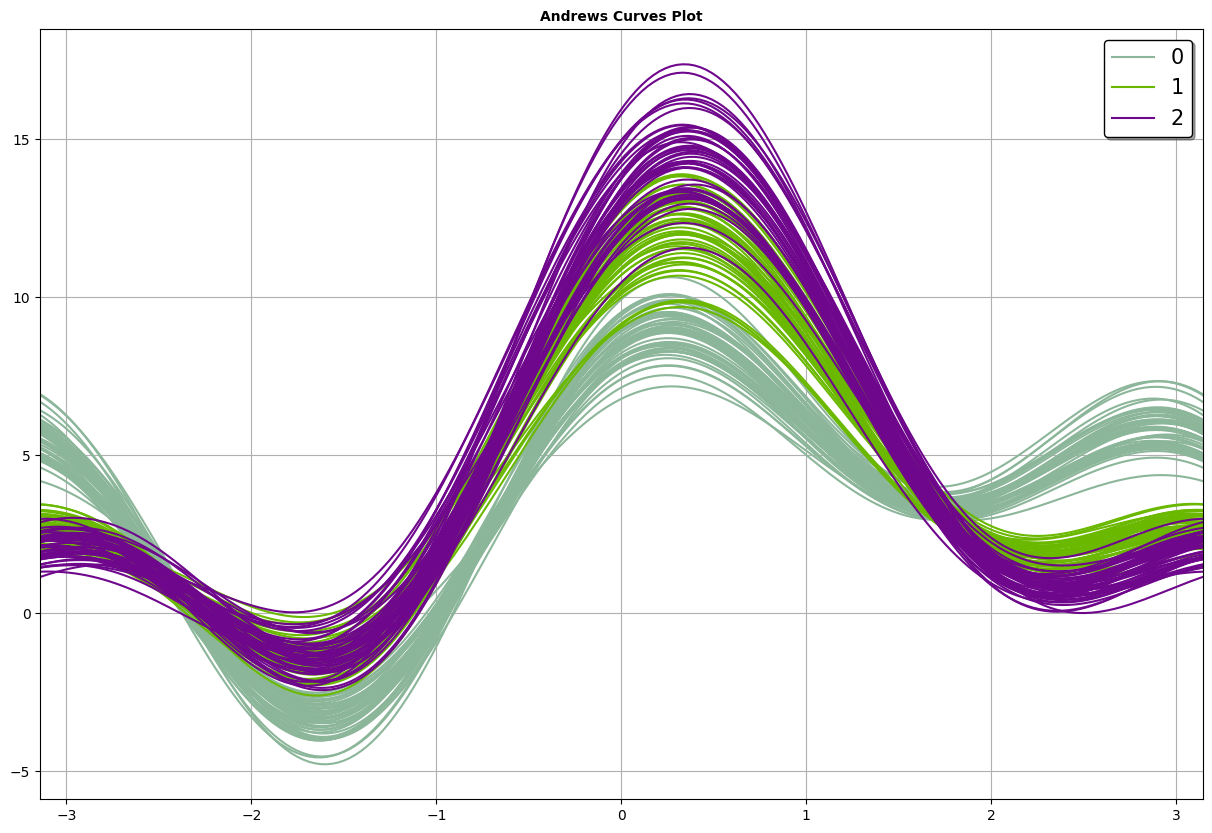

In [199]:
from pandas.plotting import andrews_curves
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
andrews_curves(df.drop("Id", axis=1), "species")
plt.title('Andrews Curves Plot', fontsize=10, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()